<a href="https://www.kaggle.com/code/jfjerin/image-properties?scriptVersionId=274684865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/106_cyt01.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/094_cyt02.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/001_cyt08.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/019_nuc09.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/045_nuc02.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/096_nuc08.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/042_nuc01.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/034_nuc05.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/041_nuc05.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/096_nuc07.dat
/kaggle/input/cervical-cancer-largest-dataset-sipa


 Image Property Summary Statistics:
                      min          max         mean       median           std
Width         2048.000000  2048.000000  2048.000000  2048.000000  0.000000e+00
Height        1536.000000  1536.000000  1536.000000  1536.000000  0.000000e+00
Aspect_Ratio     1.333333     1.333333     1.333333     1.333333  2.889471e-15
Mean_R          50.500762   250.118194   167.004694   170.441381  3.609906e+01
Mean_G          70.649716   249.132028   168.023361   167.652329  3.824757e+01
Mean_B          71.525618   254.304962   188.520046   192.603080  4.077872e+01


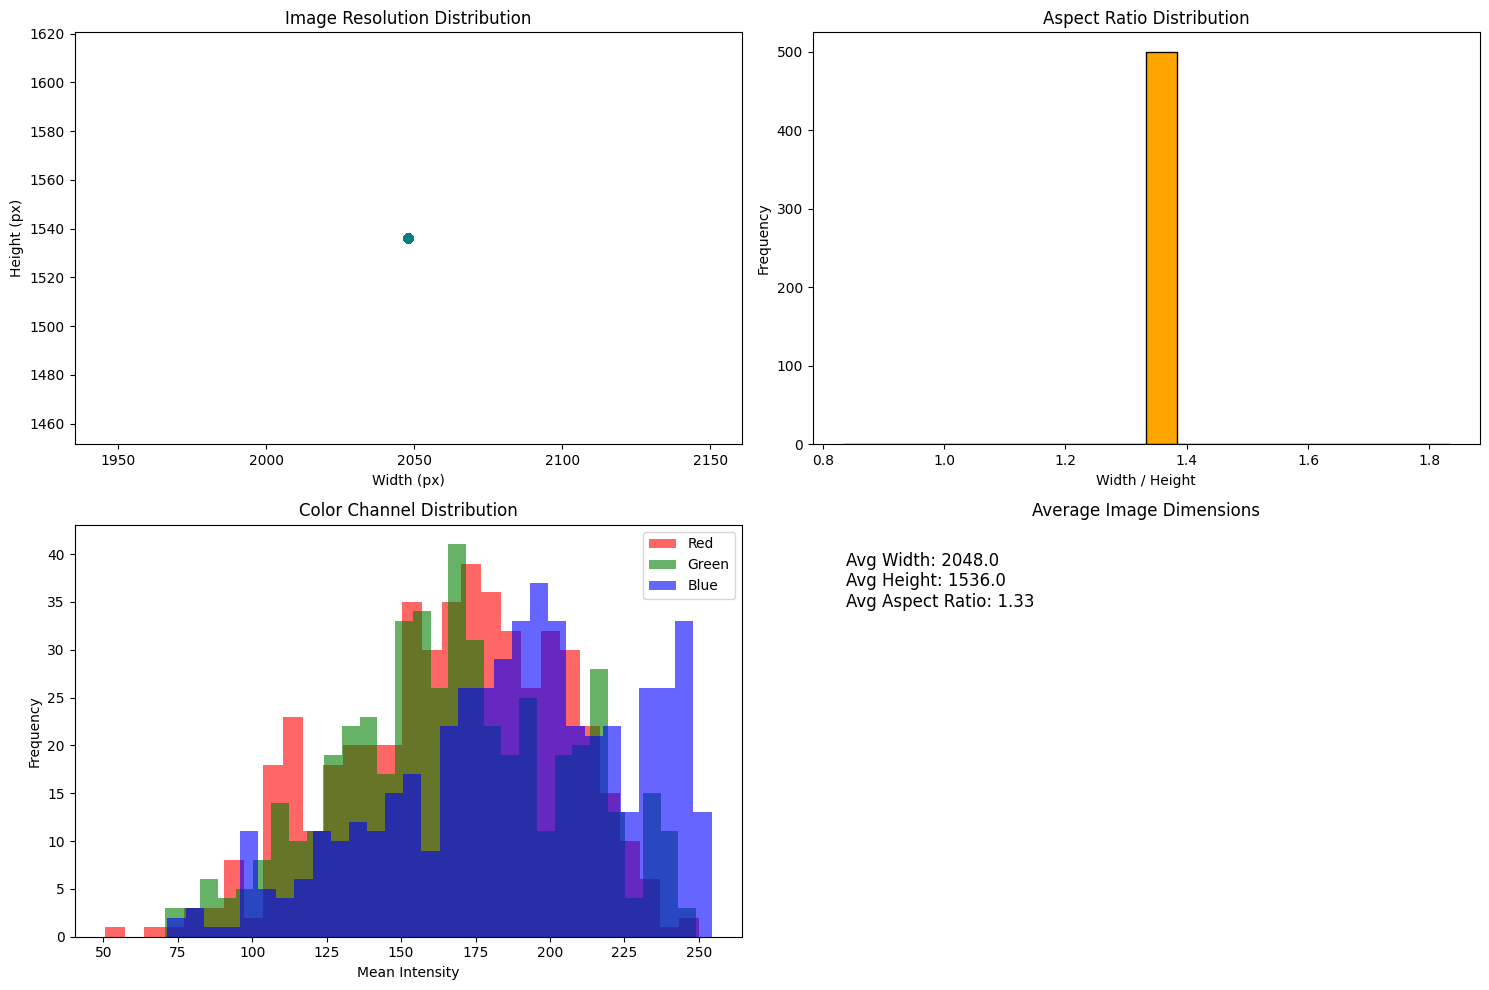

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Base directory
image_dir = '/kaggle/input/cervical-cancer-largest-dataset-sipakmed'

# Collect image property data
widths, heights, aspect_ratios = [], [], []
mean_r, mean_g, mean_b = [], [], []

# Loop through all classes
for cls in os.listdir(image_dir):
    class_path = os.path.join(image_dir, cls)
    
    # Check if images are in inner folder (some datasets have nested folders)
    inner_path = os.path.join(class_path, cls)
    if os.path.isdir(inner_path):
        class_path = inner_path
    
    image_files = [os.path.join(class_path, f)
                   for f in os.listdir(class_path)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    
    for img_path in image_files[:100]:  # sample up to 100 images per class for efficiency
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Convert grayscale → RGB
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        h, w, _ = img.shape
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)

        # Mean color per channel (OpenCV loads BGR)
        b, g, r = cv2.mean(img)[:3]
        mean_r.append(r)
        mean_g.append(g)
        mean_b.append(b)

# --- Create DataFrame for summary ---
df_summary = pd.DataFrame({
    'Width': widths,
    'Height': heights,
    'Aspect_Ratio': aspect_ratios,
    'Mean_R': mean_r,
    'Mean_G': mean_g,
    'Mean_B': mean_b
})

# --- Descriptive statistics ---
print("\n Image Property Summary Statistics:")
print(df_summary.describe().T[['min', 'max', 'mean', '50%', 'std']].rename(columns={'50%': 'median'}))

# --- Visualization Section ---
plt.figure(figsize=(15, 10))

# Resolution scatter
plt.subplot(2, 2, 1)
plt.scatter(widths, heights, alpha=0.5, color='teal')
plt.title("Image Resolution Distribution")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")

# Aspect ratio histogram
plt.subplot(2, 2, 2)
plt.hist(aspect_ratios, bins=20, color='orange', edgecolor='black')
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Frequency")

# Mean color channel distribution
plt.subplot(2, 2, 3)
plt.hist(mean_r, bins=30, color='red', alpha=0.6, label='Red')
plt.hist(mean_g, bins=30, color='green', alpha=0.6, label='Green')
plt.hist(mean_b, bins=30, color='blue', alpha=0.6, label='Blue')
plt.title("Color Channel Distribution")
plt.xlabel("Mean Intensity")
plt.ylabel("Frequency")
plt.legend()

# Text summary for quick glance
plt.subplot(2, 2, 4)
plt.text(0.05, 0.8, f"Avg Width: {np.mean(widths):.1f}\n"
                    f"Avg Height: {np.mean(heights):.1f}\n"
                    f"Avg Aspect Ratio: {np.mean(aspect_ratios):.2f}", fontsize=12)
plt.axis('off')
plt.title("Average Image Dimensions")

plt.tight_layout()
plt.show()